# Predicting cab booking cancellation
### Capstone Project One 
### Notebook by Debisree Ray


**- Importing all the necessary libraries <br />**
**- Checking the working directory, if needed, the directory needs to be changed to where 
we have all the data files**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

'/Users/debisreeray/Desktop/Springboard_Debisree/predicting-cab-booking-cancellations'

**Checking the Data : Data wrangling**

In [3]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [10]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [6]:
#summary statistics of the dataframe:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


We see that many of the columns (eg. 'package_id', 'to_area_id' etc.) have missing values. 

In [7]:
#Let's set id to be the index of the dataset

df.set_index('id', inplace=True)
df.head()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
id,,,,,,,,,,,,,,,,,,,
132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [8]:
#find out the class balance
df.Car_Cancellation.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

So, there is major class imbalance in the data. Very few cancellations as compared to large amount of non-cancellations.

In [9]:
# Lets see the distribution of package_id
df.package_id.value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [10]:
df.travel_type_id.value_counts()

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

In [10]:
df.from_city_id.value_counts()

15.0    16233
1.0       106
31.0        6
Name: from_city_id, dtype: int64

In [17]:
df.mobile_site_booking.value_counts()


0    41553
1     1878
Name: mobile_site_booking, dtype: int64

In [16]:
df.online_booking.value_counts()

0    28161
1    15270
Name: online_booking, dtype: int64

**Visual Story Telling**

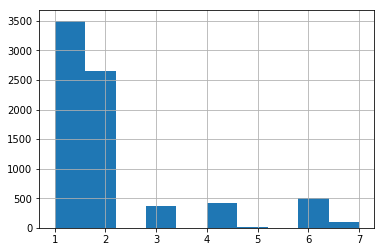

In [11]:
df.package_id.hist();

**So, what we see is, most of the packages people opt for are for a journey of 4hrs and around 40kms, followed by 8hrs and 80kms**

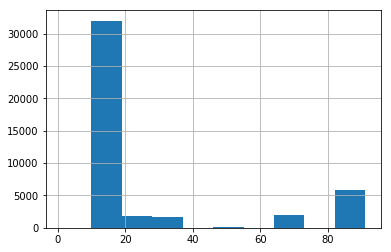

In [35]:
df.vehicle_model_id.hist();

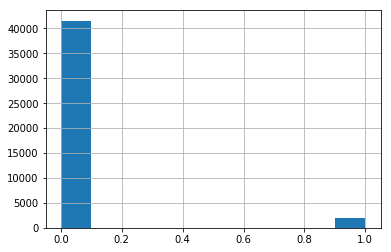

In [9]:
df.mobile_site_booking.hist();

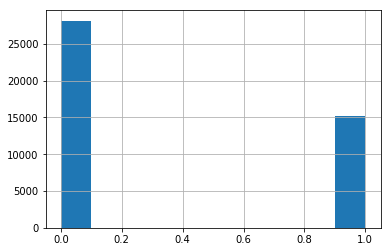

In [10]:
df.online_booking.hist();

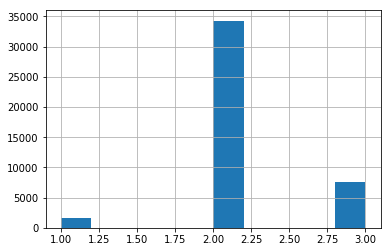

In [36]:
df.travel_type_id.hist();

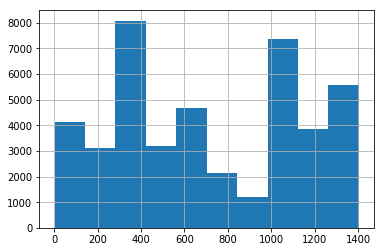

In [4]:
df.from_area_id.hist();

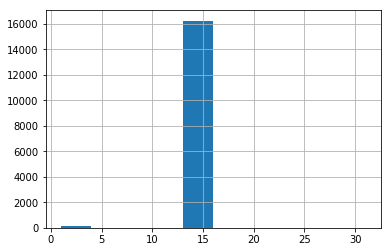

In [38]:
df.from_city_id.hist();

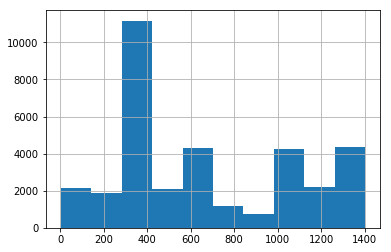

In [5]:
df.to_area_id.hist();

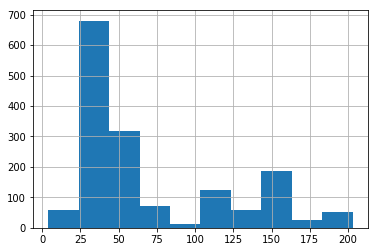

In [6]:
df.to_city_id.hist();

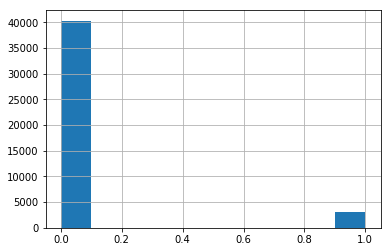

In [11]:
df.Car_Cancellation.hist();

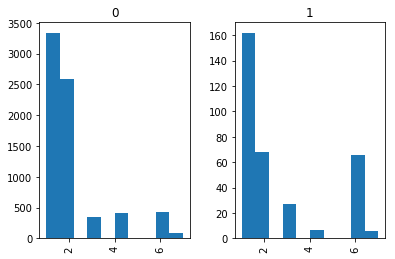

In [12]:
# Let's see if the package type can affect the car cancellations
df.hist(column='package_id', by='Car_Cancellation');

**So we can see that, most of the times 1st package ( 4hrs & 40kms ) gets cancelled followed by the packages ( 3hrs & 30kms ) and ( 8hrs & 80kms )**

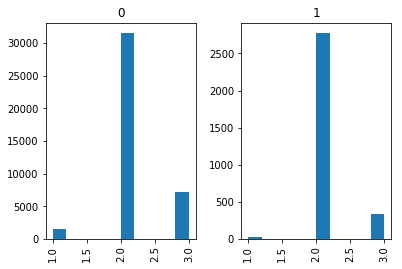

In [13]:
# Lets take a look at travel_type variable
df.hist(column='travel_type_id', by='Car_Cancellation');

**Most people rent car from point to point travel and around ( 1 / 10 )th of these bookings get cancelled**

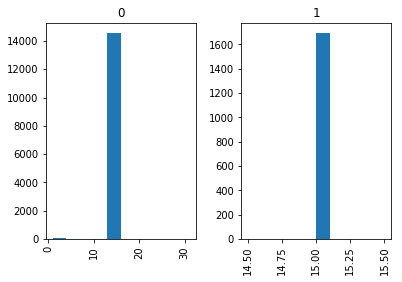

In [14]:
df.hist(column='from_city_id',by='Car_Cancellation');

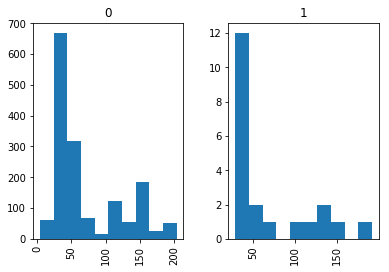

In [7]:
df.hist(column='to_city_id',by='Car_Cancellation');

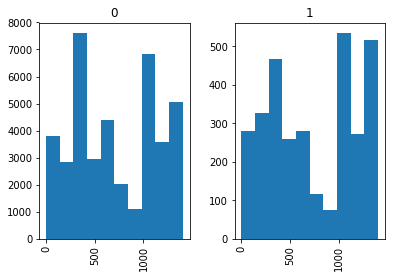

In [3]:
df.hist(column='from_area_id',by='Car_Cancellation');

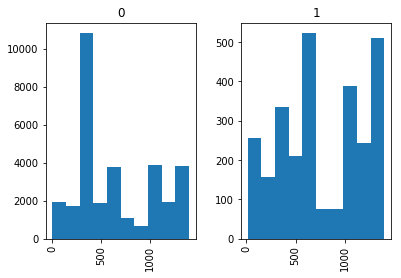

In [8]:
df.hist(column='to_area_id',by='Car_Cancellation');

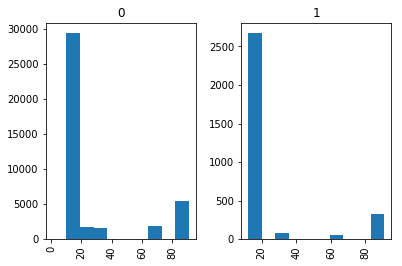

In [4]:
df.hist(column='vehicle_model_id',by='Car_Cancellation');

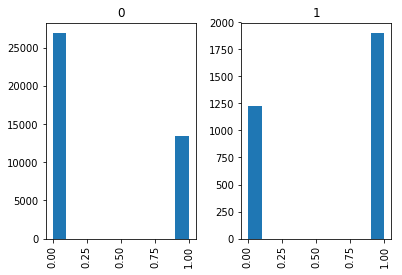

In [25]:
df.hist(column='online_booking',by='Car_Cancellation');

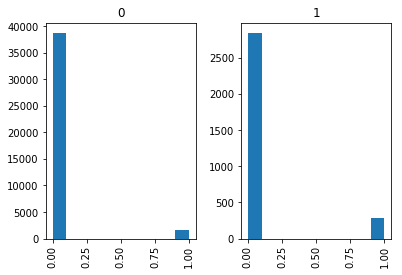

In [29]:
df.hist(column='mobile_site_booking',by='Car_Cancellation');

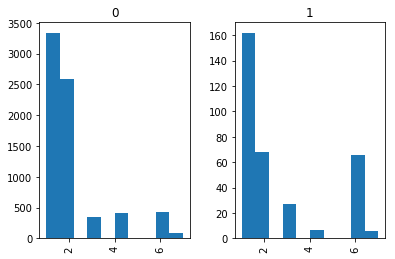

In [24]:
df.hist('package_id','Car_Cancellation');